In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/new results'

/content/gdrive/My Drive/new results


In [ ]:
import pandas as pd
full = pd.read_csv("/content/gdrive/My Drive/sst2/rep/50K-1/twitter140.csv", encoding='latin-1',dtype = str)
text_list = full.iloc[:,5]
lab_list = full.iloc[:,0]
full.columns = ["label", "id", "date", "flag", "user", "text"]

can_df = pd.read_csv("ca.csv").dropna()

#can_df = balance(can_df)
ca_text_clean2 = can_df["text"].tolist()
ca_lab = can_df["labels"].tolist()
ca_lab2 = [str(w) for w in ca_lab]

au_df = pd.read_csv("au.csv").dropna()
#can_df = balance(can_df)
au_text_clean2 = au_df["text"].tolist()
au_lab = au_df["labels"].tolist()
au_lab2 = [str(w) for w in au_lab]

nz_df = pd.read_csv("nz.csv").dropna()
#can_df = balance(can_df)
nz_text_clean2 = nz_df["text"].tolist()
nz_lab = nz_df["labels"].tolist()
nz_lab2 = [str(w) for w in nz_lab]


uk_df = pd.read_csv("uk.csv").dropna()
#can_df = balance(can_df)
uk_text_clean2 = uk_df["text"].tolist()
uk_lab = uk_df["labels"].tolist()
uk_lab2 = [str(w) for w in uk_lab]

us_df = pd.read_csv("us.csv").dropna()
#can_df = balance(can_df)
us_text_clean2 = us_df["text"].tolist()
us_lab = us_df["labels"].tolist()
us_lab2 = [str(w) for w in us_lab]

za_df = pd.read_csv("za.csv").dropna()
#can_df = balance(can_df)
za_text_clean2 = za_df["text"].tolist()
za_lab = za_df["labels"].tolist()
za_lab2 = [str(w) for w in za_lab]

In [ ]:
import re
from sklearn.utils import resample
samp_50k_df = pd.concat([can_df, au_df, nz_df, uk_df, us_df,za_df], ignore_index=True, sort=False )
base_50k, base_50k_lab = resample(text_list, lab_list, random_state = 909, n_samples = 810, replace= False)
samp_50k_lab = [*ca_lab2,*au_lab2,*nz_lab2,*uk_lab2,*us_lab2, *za_lab2]
base_clean = [' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",t).split()) for t in base_50k]
samp_50k = [*ca_text_clean2,*au_text_clean2,*nz_text_clean2,*uk_text_clean2,*us_text_clean2, *za_text_clean2]
mixed_50k, mixed_lab = resample(samp_50k, samp_50k_lab, random_state = 327, n_samples = 225, replace = False)
base_clean, base_lab = resample(base_clean, base_50k_lab, random_state = 327, n_samples = 225, replace = False)

In [ ]:
from sklearn.utils import resample
uk_text_clean, uk_lab = resample(uk_text_clean2, uk_lab2, random_state = 909, n_samples = 225, replace= False)
us_text_clean, us_lab = resample(us_text_clean2, us_lab2, random_state = 909, n_samples = 225, replace= False)
au_text_clean, au_lab = resample(au_text_clean2, au_lab2, random_state = 909, n_samples = 225, replace= False)
ca_text_clean, ca_lab = resample(ca_text_clean2, ca_lab2, random_state = 909, n_samples = 225, replace= False)
nz_text_clean, nz_lab = resample(nz_text_clean2, nz_lab2, random_state = 909, n_samples = 225, replace= False)
za_text_clean, za_lab = resample(za_text_clean2, za_lab2, random_state = 909, n_samples = 225, replace= False)

In [ ]:
import numpy as np

In [ ]:
!pip install -q -U "tensorflow-text==2.11.*"
!pip install -q tf-models-official==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 105.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 96.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 57.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.9.3 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 3

In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
#from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

In [ ]:
samp_50k_lab = [*ca_lab,*au_lab,*nz_lab,*uk_lab,*us_lab, *za_lab]
samp_50k = [*ca_text_clean,*au_text_clean,*nz_text_clean,*uk_text_clean,*us_text_clean, *za_text_clean]
samp_country = [*["ca"]*225, *["au"]*225,*["nz"]*225, *["uk"]*225,  *["us"]*225, *["za"]*225]

In [ ]:
def embeds_from_pretrainedBERT(text_lists):
  text_input = tf.convert_to_tensor(text_lists, dtype = None, name = "sentence")
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  #net = outputs['pooled_output']
  #net = tf.keras.layers.Dropout(0.1)(net)
  #net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  #return outputs['sequence_output']
  return outputs

In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
cs = {0: "gray", 4:"orange", "ca":"deepskyblue", "au":"crimson", "nz":"cornflowerblue", "uk":"mediumseagreen", "us":"gold", "mixed":"brown", "za":"cyan",
      "ca-0":"salmon","ca-4":"palegreen", "au-0":"mediumslateblue", "au-4":"teal", "nz-0":"olivedrab", "nz-4":"peachpuff", "uk-0":"black", "uk-4":"navajowhite", "us-0":"mediumaquamarine", "us-4":"blueviolet", "za-0":"greenyellow","za-4":"peru"}

In [ ]:
samp_embeds = embeds_from_pretrainedBERT(samp_50k)["pooled_output"]

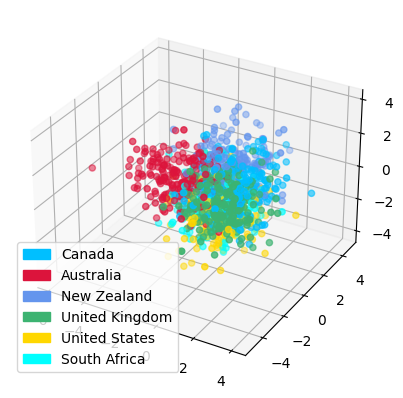

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.patches as mpatches
X = samp_embeds
Y1 = samp_country
Y2 = samp_50k_lab
#Y3 = m

lda = LinearDiscriminantAnalysis(n_components=3)
X_train = lda.fit_transform(X, Y1)

df = pd.DataFrame()
df["y1"] = samp_country
df["y2"] = samp_50k_lab
#df["y3"] = m
df["comp-1"] = X_train[:,0]
df["comp-2"] = X_train[:,1]
df["comp-3"] = X_train[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df["comp-1"] , df["comp-2"], df["comp-3"], c = df["y1"].map(cs), label = df["y1"])
ca_patch = mpatches.Patch(color="deepskyblue", label='Canada')
au_patch = mpatches.Patch(color="crimson", label='Australia')
nz_patch = mpatches.Patch(color="cornflowerblue", label='New Zealand')
uk_patch = mpatches.Patch(color="mediumseagreen", label='United Kingdom')
us_patch = mpatches.Patch(color="gold", label='United States')
za_patch = mpatches.Patch(color="cyan", label='South Africa')
mix_patch = mpatches.Patch(color="brown", label="mixed")
ax.legend(handles = [ca_patch,au_patch,nz_patch,uk_patch,us_patch,za_patch])

In [ ]:
import numpy as np

In [ ]:
def create_long(text):
  passage = []
  for i in range(100):
    text0 = resample(text, n_samples = 10, replace = False) ##creating long-text data by concatenaating 10 pieces of tweets into one
    text1 = " ".join(text0)
    passage.append(text1)
  return passage

In [ ]:
nz_long = create_long(nz_text_clean)
ca_long = create_long(ca_text_clean)
au_long = create_long(au_text_clean)
uk_long = create_long(uk_text_clean)
us_long = create_long(us_text_clean)
mixed_long = create_long(mixed_50k)
za_long = create_long(za_text_clean)

In [ ]:
samp_country = [*["ca"]*100, *["au"]*100,*["nz"]*100, *["uk"]*100,  *["us"]*100,  *["za"]*100]
samp_50k = [*ca_long,*au_long,*nz_long,*uk_long,*us_long, *za_long]

In [ ]:
base_50k, base_50k_lab = resample(text_list, lab_list, random_state = 909, n_samples = 810, replace= False)

In [ ]:
samp_embeds = embeds_from_pretrainedBERT(samp_50k)["pooled_output"]

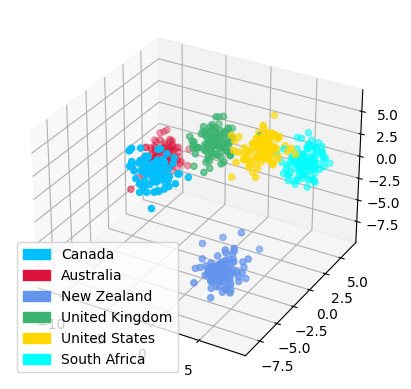

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.patches as mpatches
X = samp_embeds
Y1 = samp_country
#Y2 = samp_50k_lab
#Y3 = m

lda = LinearDiscriminantAnalysis(n_components=3)
X_train = lda.fit_transform(X, Y1)

df = pd.DataFrame()
df["y1"] = samp_country
#df["y2"] = samp_50k_lab
#df["y3"] = m
df["comp-1"] = X_train[:,0]
df["comp-2"] = X_train[:,1]
df["comp-3"] = X_train[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df["comp-1"] , df["comp-2"], df["comp-3"], c = df["y1"].map(cs), label = df["y1"])
ca_patch = mpatches.Patch(color="deepskyblue", label='Canada')
au_patch = mpatches.Patch(color="crimson", label='Australia')
nz_patch = mpatches.Patch(color="cornflowerblue", label='New Zealand')
uk_patch = mpatches.Patch(color="mediumseagreen", label='United Kingdom')
us_patch = mpatches.Patch(color="gold", label='United States')
za_patch = mpatches.Patch(color="cyan", label='South Africa')
#mix_patch = mpatches.Patch(color="brown", label="mixed")
ax.legend(handles = [ca_patch,au_patch,nz_patch,uk_patch,us_patch,za_patch])

In [ ]:
def get_dist(a,b):
  sq = np.square(a-b)
  s = np.sum(sq)
  dist = np.sqrt(s)
  return dist

In [ ]:
summary_df4 = pd.DataFrame(columns = ["ca_au", "ca_nz", "ca_uk", "ca_us", "au_nz","au_uk", "au_us","nz_uk", "nz_us", "uk_us", "mixed_ca",  "mixed_au", "mixed_nz","mixed_uk", "mixed_us", "za_mixed", "za_ca", "za_au", "za_nz", "za_uk", "za_us",
                                      "base_mixed", "base_ca", "base_au", "base_nz", "base_uk", "base_us", "base_za"])

In [ ]:
from tensorflow.python.ops.gen_array_ops import MatrixSetDiagV2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
for n in range(100):
  #results = []
  nz_long = create_long(nz_text_clean) ###create a long-text samples with size of 100
  ca_long = create_long(ca_text_clean)
  au_long = create_long(au_text_clean)
  uk_long = create_long(uk_text_clean)
  us_long = create_long(us_text_clean)
  mixed_long = create_long(mixed_50k)
  za_long = create_long(za_text_clean)
  base_long = create_long(base_50k)

  samp_country = [*["ca"]*100, *["au"]*100,*["nz"]*100, *["uk"]*100,  *["us"]*100, *["mixed"]*100,*["za"]*100, *["base"]*100]
  samp_50k = [*ca_long,*au_long,*nz_long,*uk_long,*us_long, *mixed_long,*za_long, *base_long ]
  samp_embeds = embeds_from_pretrainedBERT(samp_50k)["pooled_output"]
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
  X = samp_embeds
  Y1 = samp_country
#Y2 = samp_50k_lab
#Y3 = m

  lda = LinearDiscriminantAnalysis(n_components=3)  ###LDA projecting
  X_train = lda.fit_transform(X, Y1)

  df = pd.DataFrame()
  df["y1"] = samp_country
#df["y2"] = samp_50k_lab
#df["y3"] = m
  df["comp-1"] = X_train[:,0]
  df["comp-2"] = X_train[:,1]
  df["comp-3"] = X_train[:,2]

  ca_df = df[df["y1"]=="ca"]
#ca_mean = ca_df.mean(axis = 0).to_numpy()
  ca_cords = ca_df[["comp-1", "comp-2", "comp-3"]].to_numpy() ###get cordinates in the projection space
  ca_mean = np.mean(ca_cords, axis = 0)                       ###get the mean value for each coordinate
  au_df = df[df["y1"]=="au"]
#ca_mean = ca_df.mean(axis = 0).to_numpy()
  au_cords = au_df[["comp-1", "comp-2", "comp-3"]].to_numpy()
  au_mean = np.mean(au_cords, axis = 0)
  nz_df = df[df["y1"]=="nz"]
#ca_mean = ca_df.mean(axis = 0).to_numpy()
  nz_cords = nz_df[["comp-1", "comp-2", "comp-3"]].to_numpy()
  nz_mean = np.mean(nz_cords, axis = 0)
  uk_df = df[df["y1"]=="uk"]
#ca_mean = ca_df.mean(axis = 0).to_numpy()
  uk_cords = uk_df[["comp-1", "comp-2", "comp-3"]].to_numpy()
  uk_mean = np.mean(uk_cords, axis = 0)
  us_df = df[df["y1"]=="us"]
#ca_mean = ca_df.mean(axis = 0).to_numpy()
  us_cords = us_df[["comp-1", "comp-2", "comp-3"]].to_numpy()
  us_mean = np.mean(us_cords, axis = 0)
  mixed_df = df[df["y1"]=="mixed"]
#ca_mean = ca_df.mean(axis = 0).to_numpy()
  mixed_cords = mixed_df[["comp-1", "comp-2", "comp-3"]].to_numpy()

  mixed_mean = np.mean(mixed_cords, axis = 0)
  za_df = df[df["y1"]=="za"]
  za_cords = za_df[["comp-1", "comp-2", "comp-3"]].to_numpy()
  za_mean = np.mean(za_cords, axis = 0)
  base_df = df[df["y1"]=="base"]
#ca_mean = ca_df.mean(axis = 0).to_numpy()
  base_cords = base_df[["comp-1", "comp-2", "comp-3"]].to_numpy()

  base_mean = np.mean(base_cords, axis = 0)

  cp1 = get_dist(ca_mean, au_mean) ##calculate distance between cluster mean (mean value of coordinates)
  cp2 = get_dist(ca_mean, nz_mean)
  cp3 = get_dist(ca_mean, uk_mean)
  cp4 = get_dist(ca_mean, us_mean)
  cp5 = get_dist(nz_mean, au_mean)
  cp6 = get_dist(uk_mean, au_mean)
  cp7 = get_dist(au_mean, us_mean)
  cp8 = get_dist(nz_mean, uk_mean)
  cp9 = get_dist(nz_mean, us_mean)
  cp10 = get_dist(uk_mean, us_mean)
  cp11 = get_dist(mixed_mean, ca_mean)
  cp12 = get_dist(mixed_mean, au_mean)
  cp13 = get_dist(mixed_mean, nz_mean)
  cp14 = get_dist(mixed_mean, uk_mean)
  cp15 = get_dist(mixed_mean, us_mean)
  cp16 = get_dist(za_mean, mixed_mean)
  cp17 = get_dist(za_mean, ca_mean)
  cp18 = get_dist(za_mean, au_mean)
  cp19 = get_dist(za_mean, nz_mean)
  cp20 = get_dist(za_mean, uk_mean)
  cp21 = get_dist(za_mean, us_mean)
  cp22 = get_dist(mixed_mean, base_mean)
  cp23 = get_dist(base_mean, ca_mean)
  cp24 = get_dist(base_mean, au_mean)
  cp25 = get_dist(base_mean, nz_mean)
  cp26 = get_dist(base_mean, uk_mean)
  cp27 = get_dist(base_mean, us_mean)
  cp28 = get_dist(za_mean, base_mean)
  results = [cp1,cp2,cp3,cp4,cp5,cp6,cp7,cp8,cp9,cp10,cp11,cp12,cp13,cp14,cp15,cp16,cp17,cp18,cp19,cp20,cp21,cp22,cp23,cp24,cp25,cp26,cp27,cp28]
  summary_df4.loc[len(summary_df4.index)] = results
  print(n, "done")

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done


In [ ]:
summary_df4.to_csv("lda_distances-za-full.csv")

In [ ]:
print(summary_df4.mean())

ca_au          5.515794
ca_nz          5.665198
ca_uk          5.170902
ca_us          4.685177
au_nz          4.739787
au_uk          4.039318
au_us          5.625709
nz_uk          4.197933
nz_us          6.382908
uk_us          5.598541
mixed_ca       3.645173
mixed_au       4.448265
mixed_nz       5.305277
mixed_uk       4.834982
mixed_us       4.783244
za_mixed       4.378299
za_ca          4.166122
za_au          5.520143
za_nz          5.072893
za_uk          4.801430
za_us          4.764696
base_mixed    25.649708
base_ca       25.386050
base_au       26.033306
base_nz       25.684391
base_uk       26.148858
base_us       26.078308
base_za       25.523608
dtype: float64
